# Import Librarys

In [1]:
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#sklearn
from sklearn.metrics import precision_score, recall_score, roc_auc_score, balanced_accuracy_score
import imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
from sklearn.utils import class_weight
from imblearn.under_sampling import RandomUnderSampler
from mpl_toolkits.mplot3d import axes3d
from imblearn.under_sampling import EditedNearestNeighbours
warnings.filterwarnings('ignore')

# Import Data 

In [2]:
data = pd.read_csv('./hypothyroid.csv')
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [4]:
data.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [5]:
data.rename(columns={'binaryClass':'Label'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3772 non-null   object
 1   sex              3772 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3772 non-null   object
 10  T3               3772 non-null   object
 11  TT4              3772 non-null   object
 12  T4U              3772 non-null   object
 13  FTI              3772 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [7]:
data.replace('?',np.nan,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [9]:
data.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [12]:
data.duplicated().value_counts()

False    2642
True        1
Name: count, dtype: int64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().value_counts()

False    2642
Name: count, dtype: int64

# Visualization Data

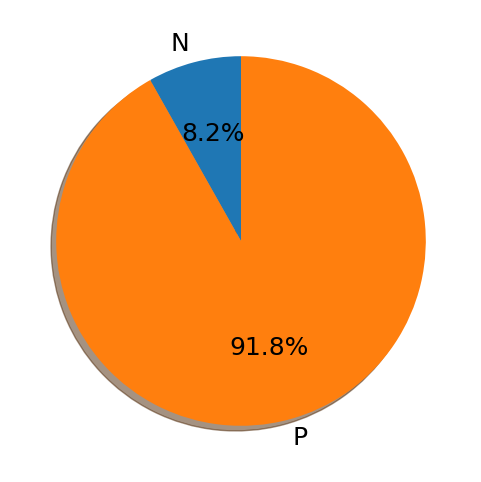

In [15]:
plt.rcParams["figure.figsize"]=(6,6)

unique_elements , counts_elements = np.unique(data.Label,return_counts=True)
fig1,ax1 = plt.subplots()
ax1.pie(counts_elements,labels=unique_elements,autopct = '%1.1f%%',
        shadow=True, startangle = 90, textprops={'fontsize':18})
plt.show()

In [16]:
data_copy = data.copy()

In [17]:
value_map = {'N': 1, 'P': 0}
data_copy['Label'] = data_copy['Label'].replace(value_map)


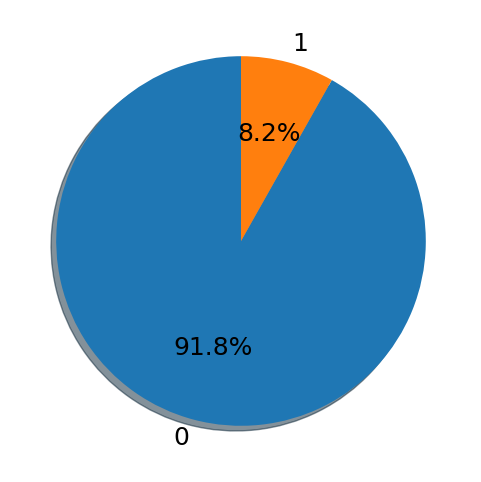

In [18]:
plt.rcParams["figure.figsize"]=(6,6)

unique_elements , counts_elements = np.unique(data_copy.Label,return_counts=True)
fig1,ax1 = plt.subplots()
ax1.pie(counts_elements,labels=unique_elements,autopct = '%1.1f%%',
        shadow=True, startangle = 90, textprops={'fontsize':18})
plt.show()

# Data Preprocessing

In [19]:
X = data_copy.drop('Label',axis=1)
y = data_copy.Label

In [20]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [21]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

In [23]:
# scalr = MinMaxScaler()
# X_train.TT4 = scalr.fit_transform(X_train[['TT4']])
# X_train.age = scalr.fit_transform(X_train[['age']])
# X_train.FTI = scalr.fit_transform(X_train[['FTI']])

# scalr.fit(X_train[['TT4']])

# X_test.TT4 = scalr.transform(X_test[['TT4']])
# X_test.age = scalr.transform(X_test[['age']])
# X_test.FTI = scalr.transform(X_test[['FTI']])

In [24]:
# X_test.TT4 = scalr.fit_transform(X_test[['TT4']])
# X_test.age = scalr.fit_transform(X_test[['age']])
# X_test.FTI = scalr.fit_transform(X_test[['FTI']])

# Build Models

In [25]:
import pandas as pd
import matplotlib

models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC()
}
result_lg = []
result_svm = []
def support(cv_results):
    precision_score = cv_results['test_precision'].mean() 
    recall_score =  cv_results['test_recall'].mean()
    auc_score = cv_results['test_roc_auc'].mean()
    balanced_accuracy = cv_results['test_balanced_accuracy'].mean()
    return precision_score, recall_score, auc_score, balanced_accuracy
def score(y,y_pre):
    precision = precision_score(y, y_pre)
    recall = recall_score(y, y_pre)
    auc = roc_auc_score(y, y_pre)
    balanced_accuracy = balanced_accuracy_score(y, y_pre)
    return precision, recall, auc, balanced_accuracy

def createDataFrame(data):

    # Create the DataFrame
    df = pd.DataFrame(data)

    df.style.set_properties(
        **{
            'index.align': 'center',
            'index.vertical_align': 'middle',
            'columns.align': 'center',
            'columns.vertical_align': 'middle',
            'format.precision': 3,  # Set precision for floating-point numbers to 3 decimals
            'text.color': 'black',  # Set text color to black
            'background.color': 'white',  # Set background color to white
            'border.color': 'lightgray',  # Set border color to light gray
            'grid.color': 'none',  # Remove grid lines
        }
    )
    return df

def plot_confusionMatrix(y,y_pred,labels):
    cm = confusion_matrix(y,y_pred, labels=labels)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=labels)
    return disp2



    
def plot_evalution(model,name,X_tr,y_tr,X_te,y_te):
    model_lg = model['estimator'][-1]
    y_pred = model_lg.predict(X_te)

    precision_score2_test,recall_score2_test,auc_score2_test, balanced_accuracy2_test = score(y_te,y_pred)
    
    precision_score2, recall_score2, auc_score2, balanced_accuracy2 = support(model)

    measure_train = {
        'Name':[name],
        'precision':[precision_score2],
        'recall': [recall_score2],
        'AUC_ROC':[auc_score2],
        # 'Balanced Accuracy': [balanced_accuracy_lg,balanced_accuracy2]
    }
    measure_test = {
        'Name':  [name],
    'precision':[precision_score2_test],
        'recall': [recall_score2_test],
        'AUC_ROC':[auc_score2_test],
        # 'Balanced Accuracy': [balanced_accuracy_lg_test,balanced_accuracy2_test]
    }

    # Create the DataFrame
    df_train = createDataFrame(measure_train)
    df_test = createDataFrame(measure_test)
    confusionMatrix = plot_confusionMatrix(y_te,y_pred,np.unique(y_te))
    
    


    return df_test,confusionMatrix

def visualizeConfusionMatrix(con,title):
    con.plot()
    plt.title(title)
    plt.show()
    
def plot_many_image(arr,name):
    size =len(arr)
    if(size>2):
        f, axes = plt.subplots(2,2,figsize=(20,10))
        index=0
        for i in range(2):
            for j in range(2):
                arr[index].plot(ax=axes[i][j])
                axes[i][j].set_title(name[index],size = 13)
                index+=1
        plt.subplots_adjust(hspace=0.5,wspace=0.01)
        plt.show()
                
    else:
        f, axes = plt.subplots(1,2,figsize=(15,8))
        for i in range(len(arr)):
                arr[i].plot(ax=axes[i])
                axes[i].set_title(name[i],size = 13)
        plt.show()
   

def trainModel(model,model_name,X_train,y_train,X_test,y_test):
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_estimator=True)
    a,confusionMatrix = plot_evalution(results,model_name,X_train,y_train,X_test,y_test)
    # visualizeConfusionMatrix(confusionMatrix,model_name)
    if "Logistic Regression" in model_name:
        result_lg.append(a)
    else:
        result_svm.append(a)    
    return a,confusionMatrix

## Initial results with imbalanced data 

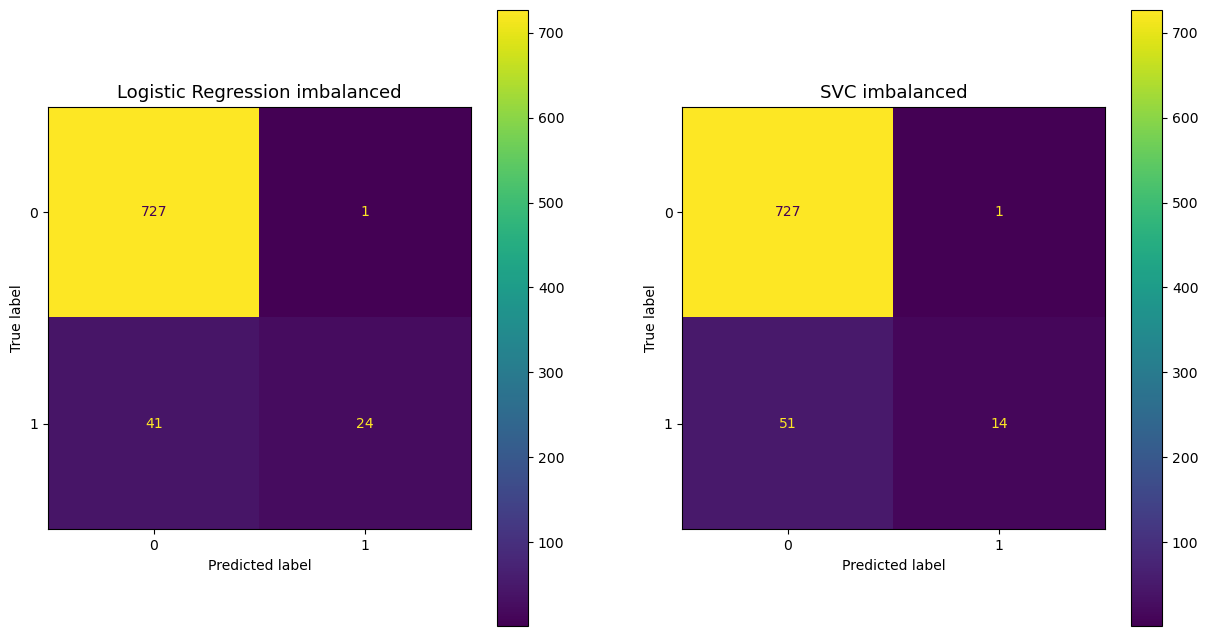

,precision,recall,AUC_ROC
Name,,,
Logistic Regression imbalanced,0.960000,0.369231,0.683929
SVC imbalanced,0.933333,0.215385,0.607005


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

scoring = ['precision','recall','roc_auc', 'average_precision', 'balanced_accuracy']
# logisticClassifier_2 =LogisticRegression()
result_init = []

confusionMatrixArr = []
name = []
for model_name, model in models.items():
    result,confusionMatrix = trainModel(model,model_name +" imbalanced",X_train,y_train,X_test,y_test)
    result_init.append(result)
    confusionMatrixArr.append(confusionMatrix)
    name.append(model_name +" imbalanced")


plot_many_image(confusionMatrixArr,name)
measure_test = pd.concat(result_init, ignore_index=True)
measure_test.set_index('Name', inplace=True)
measure_test

## UnderSamping & OverSampling

### UnderSampling

In [27]:
samplers = {
    'Random UnderSampler': RandomUnderSampler(),
    'EditedNearestNeighbours_10':EditedNearestNeighbours(n_neighbors=10),
    'EditedNearestNeighbours_40':EditedNearestNeighbours(n_neighbors=40),
    'EditedNearestNeighbours_80':EditedNearestNeighbours(n_neighbors=80)
}
confusionMatrixArr = []
name = []
result_undersampling = []
# Loop qua từng phương pháp over-sampling
for sampler_name, sampler in samplers.items():
    for model_name, model in models.items():
        # Over-sampling dữ liệu huấn luyện
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        result,confusionMatrix = trainModel(model,sampler_name +" & " + model_name,X_resampled,y_resampled,X_test,y_test)
        result_undersampling.append(result)

        confusionMatrixArr.append(confusionMatrix)
        name.append(sampler_name +" & " + model_name)
# plot_many_image(confusionMatrixArr,name)
measure_test_undersampling = pd.concat(result_undersampling, ignore_index=True)
measure_test_undersampling.set_index('Name', inplace=True)
measure_test_undersampling

,precision,recall,AUC_ROC
Name,,,
Random UnderSampler & Logistic Regression,0.771084,0.984615,0.979258
Random UnderSampler & SVC,0.506849,0.569231,0.759890
EditedNearestNeighbours_10 & Logistic Regression,0.812500,0.800000,0.891758
EditedNearestNeighbours_10 & SVC,0.944444,0.261538,0.630082
EditedNearestNeighbours_40 & Logistic Regression,0.559633,0.938462,0.936264
EditedNearestNeighbours_40 & SVC,0.878788,0.446154,0.720330
EditedNearestNeighbours_80 & Logistic Regression,0.375000,0.969231,0.912500
EditedNearestNeighbours_80 & SVC,0.292308,0.584615,0.729121


### OverSampling

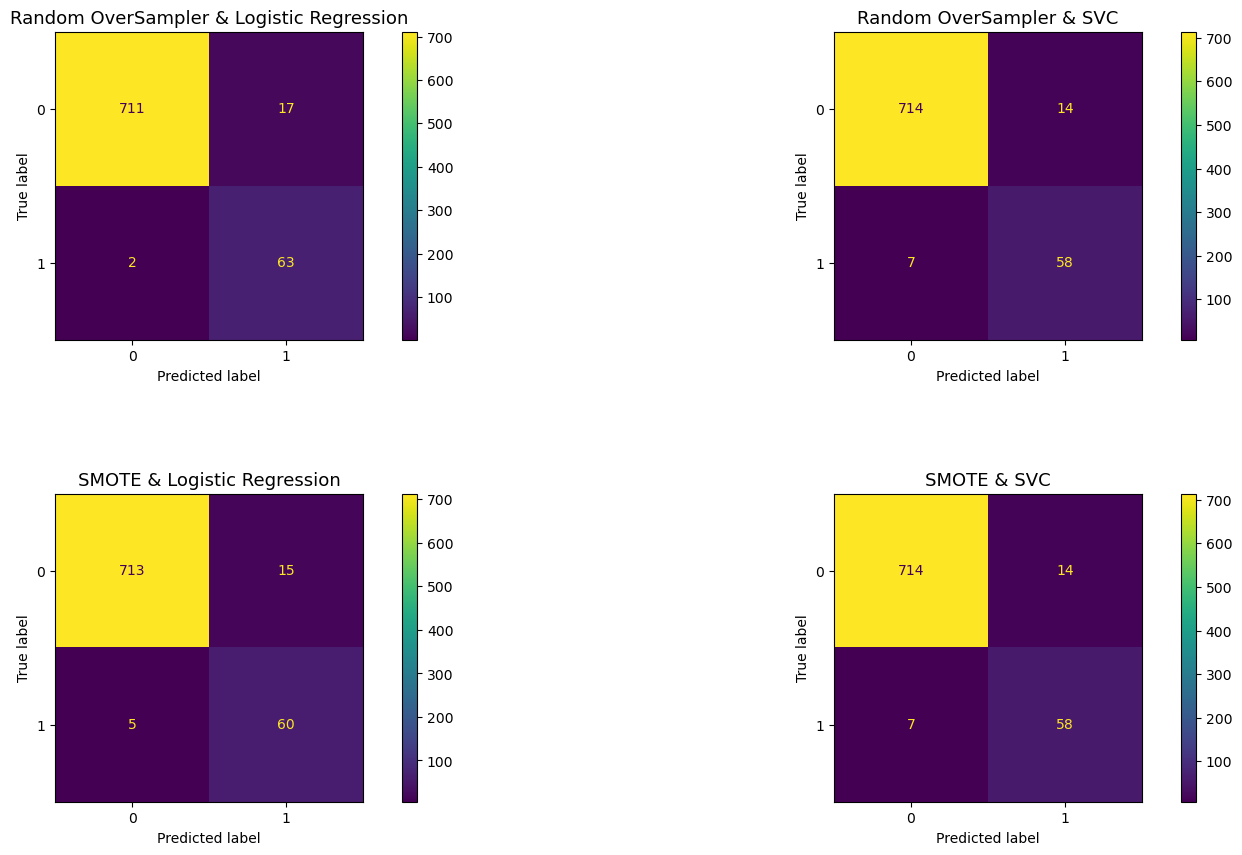

,precision,recall,AUC_ROC
Name,,,
Random OverSampler & Logistic Regression,0.787500,0.969231,0.972940
Random OverSampler & SVC,0.805556,0.892308,0.936538
SMOTE & Logistic Regression,0.800000,0.923077,0.951236
SMOTE & SVC,0.805556,0.892308,0.936538


In [28]:
samplers = {
    'Random OverSampler': RandomOverSampler(),
    'SMOTE': SMOTE()
}
confusionMatrixArr = []
name = []
result_oversampling = []
# Loop qua từng phương pháp over-sampling
for sampler_name, sampler in samplers.items():
    for model_name, model in models.items():
        # Over-sampling dữ liệu huấn luyện
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        result,confusionMatrix = trainModel(model,sampler_name +" & " + model_name,X_resampled,y_resampled,X_test,y_test)
        result_oversampling.append(result)

        confusionMatrixArr.append(confusionMatrix)
        name.append(sampler_name +" & " + model_name)


plot_many_image(confusionMatrixArr,name)
measure_test_Oversampling = pd.concat(result_oversampling, ignore_index=True)
measure_test_Oversampling.set_index('Name', inplace=True)
measure_test_Oversampling


## Cost Sensitive Learn

In [29]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [30]:
class_weights

array([0.54446408, 6.12251656])

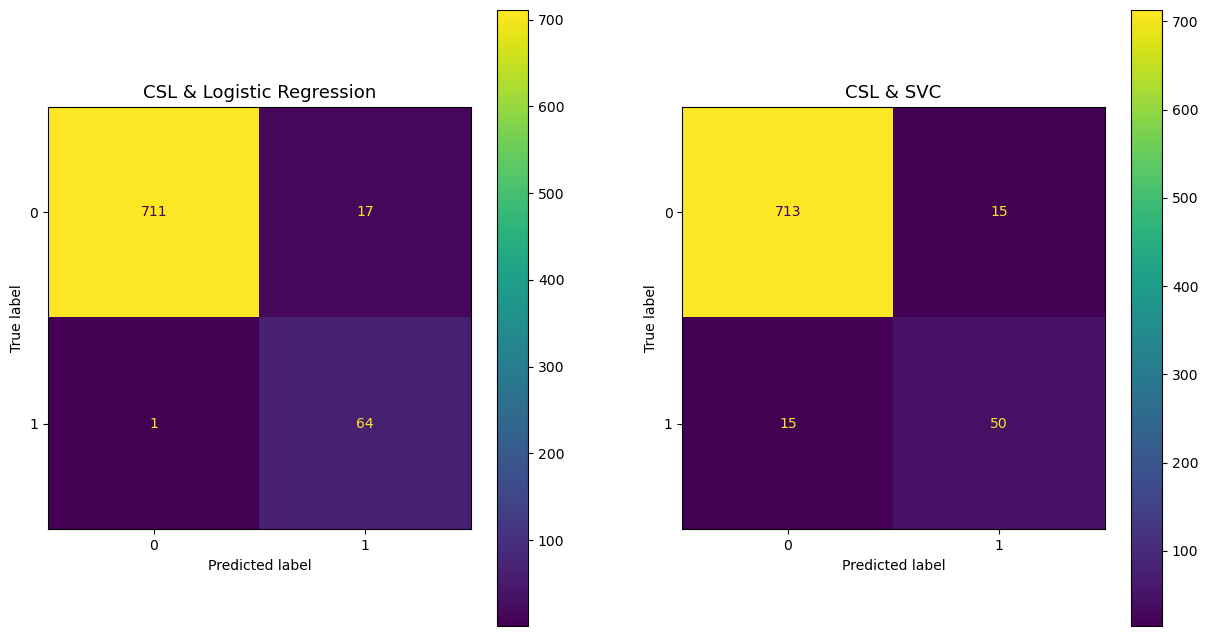

,precision,recall,AUC_ROC
Name,,,
CSL & Logistic Regression,0.790123,0.984615,0.980632
CSL & SVC,0.769231,0.769231,0.874313


In [31]:
models_csl = {
    'CSL & Logistic Regression': LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}),
    'CSL & SVC': SVC(class_weight={0: class_weights[0], 1: class_weights[1]})
}

confusionMatrixArr = []
name = []

result_csl = []
for model_name, model in models_csl.items():
    result,confusionMatrix = trainModel(model,model_name,X_train,y_train,X_test,y_test)
    result_csl.append(result)
    confusionMatrixArr.append(confusionMatrix)
    name.append(model_name)


plot_many_image(confusionMatrixArr,name)
    
measure_test_csl = pd.concat(result_csl, ignore_index=True)
measure_test_csl.set_index('Name', inplace=True)
measure_test_csl

## Ensemble learning

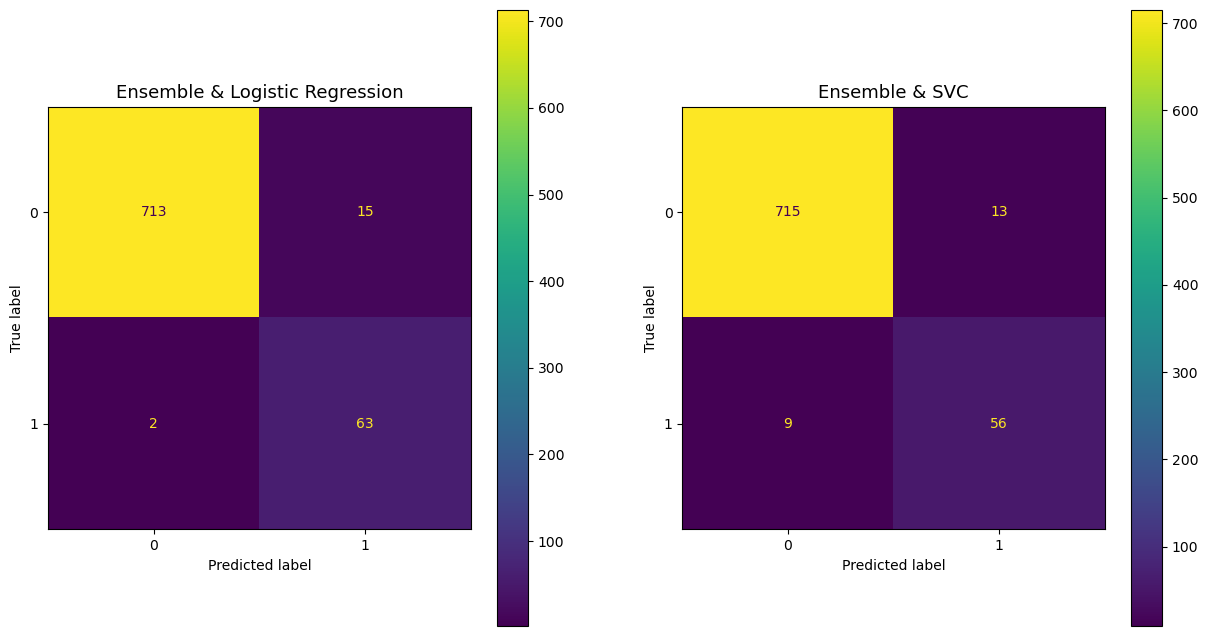

,precision,recall,AUC_ROC
Name,,,
Ensemble Logistic Regression,0.807692,0.969231,0.974313
Ensemble SVC,0.811594,0.861538,0.921841


In [32]:
result_ensemble = []
confusionMatrixArr = []
name = []
for model_name, model in models.items():
    classifier = imblearn.ensemble.BalancedBaggingClassifier(estimator=model,
                                                         n_estimators=5,
                                                         sampling_strategy=1,
                                                         bootstrap=True,
                                                         sampler=imblearn.over_sampling.SMOTE(),
                                                         random_state=0)
    result,confusionMatrix = trainModel(classifier,"Ensemble "+model_name,X_train,y_train,X_test,y_test)
    result_ensemble.append(result)
    confusionMatrixArr.append(confusionMatrix)
    name.append("Ensemble & "+model_name)


plot_many_image(confusionMatrixArr,name)    
measure_test_ensemble = pd.concat(result_ensemble, ignore_index=True)
measure_test_ensemble.set_index('Name', inplace=True)
measure_test_ensemble

##  Clustering-Based Prototype Generation

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.utils import resample
import random


def generate_synthetic_samples(X_train, y_train, minority_class_label, balance_level, num_clusters=5):
    X_minority = X_train[y_train == minority_class_label]
     
    num_minority_samples = X_minority.shape[0]
    num_majority_samples = X_train.shape[0] - num_minority_samples

    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_minority)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.predict(X_minority) 
    
    distances = pairwise_distances_argmin_min(X_minority, cluster_centers)[1]
    normalized_distances = distances / np.sum(distances)
    
    num_new_samples = np.round(normalized_distances * (num_majority_samples - num_minority_samples) * balance_level).astype(int)
    synthetic_samples = []
    counter = 0

    for index, row in X_minority.iterrows():
        for i in range(num_new_samples[counter]):
            data = pd.to_numeric(row, errors='coerce')
            d = np.abs(data - cluster_centers[cluster_labels[counter]])
            random_number = random.uniform(0, 1)
            new_sample = data + d * random_number
            synthetic_samples.append(new_sample.to_frame().T)

        counter+=1
    
    
    X_synthetic =pd.concat(synthetic_samples, ignore_index=True)
    y_synthetic = np.concatenate((y_train, np.full(X_synthetic.shape[0], minority_class_label)))

    X_synthetic = pd.concat([X_train, X_synthetic], axis=0)
    return X_synthetic, y_synthetic

# Sử dụng hàm
X_synthetic,y_synthetic = generate_synthetic_samples(X_train, y_train, minority_class_label=1, balance_level=1)


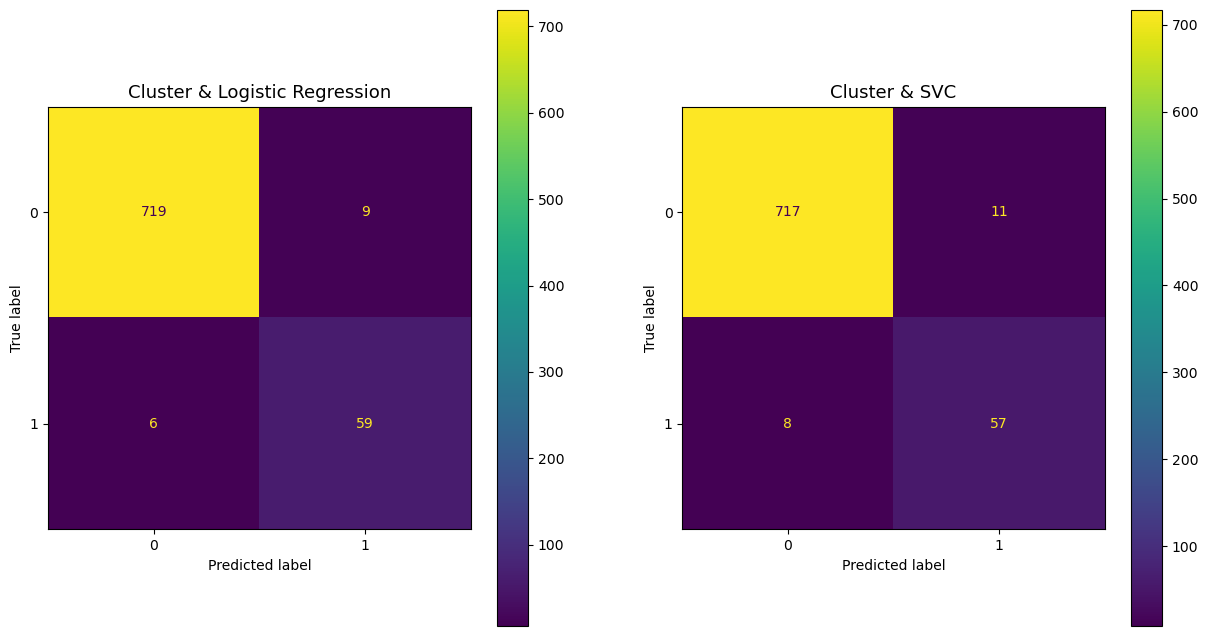

,precision,recall,AUC_ROC
Name,,,
Cluster & Logistic Regression,0.867647,0.907692,0.947665
Cluster & SVC,0.838235,0.876923,0.930907


In [34]:
result_Cluster = []
confusionMatrixArr = []
name = []
for model_name, model in models.items():
    result,confusionMatrix = trainModel(model,"Cluster & "+model_name,X_synthetic,y_synthetic,X_test,y_test)
    result_Cluster.append(result)
    confusionMatrixArr.append(confusionMatrix)
    name.append("Cluster & "+model_name)


plot_many_image(confusionMatrixArr,name)     

measure_test_Cluster = pd.concat(result_Cluster, ignore_index=True)
measure_test_Cluster.set_index('Name', inplace=True)
measure_test_Cluster

# Evaluation

In [35]:
measure_full_lg = pd.concat(result_lg, ignore_index=True)
measure_full_lg.set_index('Name', inplace=True)
measure_full_lg

,precision,recall,AUC_ROC
Name,,,
Logistic Regression imbalanced,0.960000,0.369231,0.683929
Random UnderSampler & Logistic Regression,0.771084,0.984615,0.979258
EditedNearestNeighbours_10 & Logistic Regression,0.812500,0.800000,0.891758
EditedNearestNeighbours_40 & Logistic Regression,0.559633,0.938462,0.936264
EditedNearestNeighbours_80 & Logistic Regression,0.375000,0.969231,0.912500
Random OverSampler & Logistic Regression,0.787500,0.969231,0.972940
SMOTE & Logistic Regression,0.800000,0.923077,0.951236
CSL & Logistic Regression,0.790123,0.984615,0.980632
Ensemble Logistic Regression,0.807692,0.969231,0.974313


In [36]:
measure_full_svm = pd.concat(result_svm, ignore_index=True)
measure_full_svm.set_index('Name', inplace=True)
measure_full_svm

,precision,recall,AUC_ROC
Name,,,
SVC imbalanced,0.933333,0.215385,0.607005
Random UnderSampler & SVC,0.506849,0.569231,0.759890
EditedNearestNeighbours_10 & SVC,0.944444,0.261538,0.630082
EditedNearestNeighbours_40 & SVC,0.878788,0.446154,0.720330
EditedNearestNeighbours_80 & SVC,0.292308,0.584615,0.729121
Random OverSampler & SVC,0.805556,0.892308,0.936538
SMOTE & SVC,0.805556,0.892308,0.936538
CSL & SVC,0.769231,0.769231,0.874313
Ensemble SVC,0.811594,0.861538,0.921841
